In [23]:
#I followed this tutorial to create the PCA: https://www.youtube.com/watch?v=oiusrJ0btwA
# Repo: https://github.com/dataprofessor/code/blob/master/python/PCA_analysis.ipynb
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data/data_pca_statelevel.csv')

In [3]:
df

,ds,bing_tiles_visited,single_tile_users,driving,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,...,bing_tiles_visited t-10,single_tile_users t-10,driving t-10,retail_and_recreation t-10,grocery_and_pharmacy t-10,parks t-10,transit_stations t-10,workplaces t-10,residential t-10,state
0,2020-03-11,-0.03919,0.18472,94.28,-5.0,1.0,2.0,-10.0,-3.0,2.0,...,0.02448,0.34350,95.18,3.0,13.0,20.0,-2.0,0.0,1.0,Nordrhein-Westfalen
1,2020-03-12,0.00440,0.17162,88.98,-6.0,5.0,11.0,-9.0,-3.0,2.0,...,0.10552,0.16534,96.52,-2.0,6.0,-5.0,-3.0,1.0,0.0,Nordrhein-Westfalen
2,2020-03-13,-0.04677,0.18027,83.24,-11.0,18.0,-4.0,-15.0,-4.0,4.0,...,0.03875,0.16648,103.45,2.0,5.0,24.0,-3.0,-1.0,1.0,Nordrhein-Westfalen
3,2020-03-14,-0.03018,0.23691,75.34,-18.0,9.0,44.0,-19.0,-4.0,4.0,...,-0.00509,0.17327,100.06,2.0,2.0,19.0,-5.0,-1.0,1.0,Nordrhein-Westfalen
4,2020-03-15,-0.04349,0.37500,66.70,-16.0,7.0,90.0,-18.0,-7.0,3.0,...,0.00520,0.17409,101.23,-6.0,-2.0,-15.0,-7.0,-1.0,2.0,Nordrhein-Westfalen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,2020-06-22,0.05151,0.18247,128.65,-4.0,-1.0,139.0,-14.0,-22.0,5.0,...,-0.03008,0.18600,140.77,-10.0,-1.0,190.0,-16.0,-23.0,6.0,Niedersachsen
1340,2020-06-23,0.04565,0.18028,134.49,-4.0,0.0,167.0,-13.0,-21.0,5.0,...,-0.00476,0.23851,121.34,-25.0,-7.0,121.0,-13.0,4.0,4.0,Niedersachsen
1341,2020-06-24,0.03336,0.18192,134.50,-5.0,0.0,175.0,-13.0,-20.0,5.0,...,-0.01042,0.38116,147.52,-30.0,20.0,54.0,-17.0,5.0,3.0,Niedersachsen
1342,2020-06-25,0.01524,0.18184,138.13,-9.0,0.0,151.0,-15.0,-21.0,5.0,...,0.01756,0.19461,123.81,-7.0,-3.0,107.0,-17.0,-22.0,6.0,Niedersachsen


In [4]:
input_columns = list(df.columns)

In [7]:
df['#cases']

0       705.0
1       731.0
2       863.0
3       898.0
4       888.0
        ...  
1339     21.0
1340     62.0
1341     38.0
1342     29.0
1343     30.0
Name: #cases, Length: 1344, dtype: float64

In [8]:
input_columns.remove('#cases')

In [9]:
df[input_columns]

,ds,bing_tiles_visited,single_tile_users,driving,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,...,bing_tiles_visited t-10,single_tile_users t-10,driving t-10,retail_and_recreation t-10,grocery_and_pharmacy t-10,parks t-10,transit_stations t-10,workplaces t-10,residential t-10,state
0,2020-03-11,-0.03919,0.18472,94.28,-5.0,1.0,2.0,-10.0,-3.0,2.0,...,0.02448,0.34350,95.18,3.0,13.0,20.0,-2.0,0.0,1.0,Nordrhein-Westfalen
1,2020-03-12,0.00440,0.17162,88.98,-6.0,5.0,11.0,-9.0,-3.0,2.0,...,0.10552,0.16534,96.52,-2.0,6.0,-5.0,-3.0,1.0,0.0,Nordrhein-Westfalen
2,2020-03-13,-0.04677,0.18027,83.24,-11.0,18.0,-4.0,-15.0,-4.0,4.0,...,0.03875,0.16648,103.45,2.0,5.0,24.0,-3.0,-1.0,1.0,Nordrhein-Westfalen
3,2020-03-14,-0.03018,0.23691,75.34,-18.0,9.0,44.0,-19.0,-4.0,4.0,...,-0.00509,0.17327,100.06,2.0,2.0,19.0,-5.0,-1.0,1.0,Nordrhein-Westfalen
4,2020-03-15,-0.04349,0.37500,66.70,-16.0,7.0,90.0,-18.0,-7.0,3.0,...,0.00520,0.17409,101.23,-6.0,-2.0,-15.0,-7.0,-1.0,2.0,Nordrhein-Westfalen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,2020-06-22,0.05151,0.18247,128.65,-4.0,-1.0,139.0,-14.0,-22.0,5.0,...,-0.03008,0.18600,140.77,-10.0,-1.0,190.0,-16.0,-23.0,6.0,Niedersachsen
1340,2020-06-23,0.04565,0.18028,134.49,-4.0,0.0,167.0,-13.0,-21.0,5.0,...,-0.00476,0.23851,121.34,-25.0,-7.0,121.0,-13.0,4.0,4.0,Niedersachsen
1341,2020-06-24,0.03336,0.18192,134.50,-5.0,0.0,175.0,-13.0,-20.0,5.0,...,-0.01042,0.38116,147.52,-30.0,20.0,54.0,-17.0,5.0,3.0,Niedersachsen
1342,2020-06-25,0.01524,0.18184,138.13,-9.0,0.0,151.0,-15.0,-21.0,5.0,...,0.01756,0.19461,123.81,-7.0,-3.0,107.0,-17.0,-22.0,6.0,Niedersachsen


In [31]:
lb = LabelEncoder()
df['ds'] = lb.fit_transform(df['ds'])
df['state'] = lb. fit_transform(df['state'])
df['ds']
df['state']

0       7
1       7
2       7
3       7
4       7
       ..
1339    6
1340    6
1341    6
1342    6
1343    6
Name: state, Length: 1344, dtype: int64

In [32]:
X = df[input_columns]
Y= df['#cases']

In [33]:
X = scale(X)

In [34]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
scores = pca.transform(X)

In [36]:
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,8.684544,-4.892945,-1.811001
1,8.658586,-4.979603,-2.072538
2,8.303510,-4.963257,-2.233438
3,7.838383,-5.018473,-2.430426
4,7.345606,-5.041680,-2.428468
...,...,...,...
1339,9.410766,3.001540,0.957249
1340,9.501309,2.719650,2.386873
1341,9.738826,2.936200,0.839409
1342,9.918183,3.064839,0.244260


In [37]:
Y_label = df['#cases']

In [38]:
Y_label

0       705.0
1       731.0
2       863.0
3       898.0
4       888.0
        ...  
1339     21.0
1340     62.0
1341     38.0
1342     29.0
1343     30.0
Name: #cases, Length: 1344, dtype: float64

In [40]:
cases = pd.DataFrame(Y_label, columns=['#cases'])

In [41]:
df_scores = pd.concat([scores_df, cases], axis=1)

In [42]:
df_scores

,PC1,PC2,PC3,#cases
0,8.684544,-4.892945,-1.811001,705.0
1,8.658586,-4.979603,-2.072538,731.0
2,8.303510,-4.963257,-2.233438,863.0
3,7.838383,-5.018473,-2.430426,898.0
4,7.345606,-5.041680,-2.428468,888.0
...,...,...,...,...
1339,9.410766,3.001540,0.957249,21.0
1340,9.501309,2.719650,2.386873,62.0
1341,9.738826,2.936200,0.839409,38.0
1342,9.918183,3.064839,0.244260,29.0


In [43]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3'], index=input_columns)
df_loadings

,PC1,PC2,PC3
ds,0.066724,0.251713,0.055351
bing_tiles_visited,0.106632,0.125575,-0.055017
single_tile_users,-0.076159,-0.072084,-0.119750
driving,0.114788,0.188599,0.040461
retail_and_recreation,0.121773,0.079438,0.020563
...,...,...,...
parks t-10,0.055453,0.167831,0.086955
transit_stations t-10,0.117338,-0.162429,0.024618
workplaces t-10,0.078223,-0.173393,0.093417
residential t-10,-0.098691,0.152626,-0.055736


In [44]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.45374424, 0.0811885 , 0.03904147])

In [45]:
explained_variance = np.insert(explained_variance, 0, 0)

In [46]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [47]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [48]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.453744,0.454
2,PC2,0.081189,0.535
3,PC3,0.039041,0.574


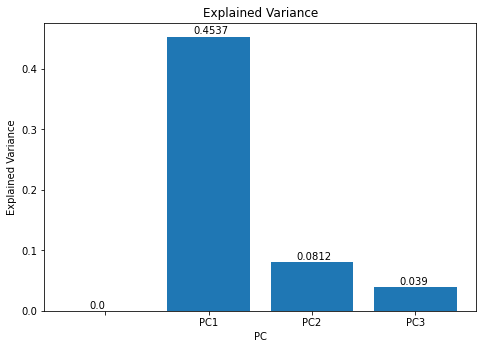

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ['','PC1', 'PC2', 'PC3']
y_axis = explained_variance
ax.bar(x_axis,y_axis)
plt.title('Explained Variance')
plt.xlabel('PC')
plt.ylabel('Explained Variance')

for i, v in enumerate(y_axis):
    plt.text(i - 0.15, v + 0.004, str(np.round(v, decimals=4)))
    
plt.show()

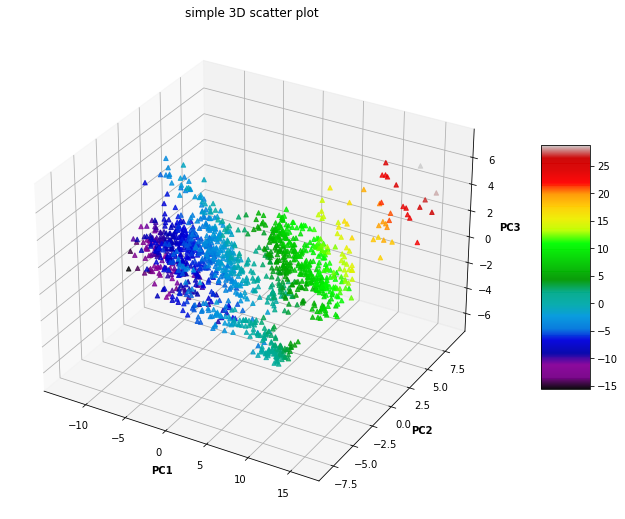

In [50]:
# Creating figure 
fig = plt.figure(figsize = (16, 9)) 
ax = plt.axes(projection ="3d") 
    
# Add x, y gridlines  
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.3,  
        alpha = 0.2)  
  
  
# Creating color map - https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
my_cmap = plt.get_cmap('nipy_spectral') 
  
# Creating plot 
sctt = ax.scatter3D(df_scores.PC1, df_scores.PC2, df_scores.PC3, 
                    alpha = 0.8, 
                    c = (df_scores.PC1 + df_scores.PC2 + df_scores.PC3),  
                    cmap = my_cmap,  
                    marker ='^') 
  
plt.title("simple 3D scatter plot") 
ax.set_xlabel('PC1', fontweight ='bold')  
ax.set_ylabel('PC2', fontweight ='bold')  
ax.set_zlabel('PC3', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 
  
# show plot 
plt.show() 